In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
import time

In [5]:
df = pd.read_csv('data_clean.csv')
df.head()

,Năm sản xuất,Tình trạng,Kiểu dáng,Số Km đã đi,Xuất xứ,Hãng xe,Dẫn động,Số chỗ ngồi,Địa điểm,Động cơ,Hộp số,Giá
0,2022,1,1484.744109,-0.134459,1,807.266174,1047.849582,7,1261.511451,949.922749,1,1050.0
1,2024,0,1484.744109,-0.537837,1,2020.743329,1047.849582,7,1261.511451,526.047696,1,2089.0
2,2007,1,920.800350,0.513257,1,896.872108,615.810390,5,452.639271,1235.879653,1,295.0
3,2024,0,1484.744109,-0.537837,1,2020.743329,2591.475859,7,1261.511451,3372.261490,1,4880.0
4,2023,0,1484.744109,-0.537837,1,391.378531,615.810390,7,1224.594385,873.263781,0,449.0


In [8]:
scaler = StandardScaler()

standard_df = scaler.fit_transform(df)

standard_df = pd.DataFrame(standard_df, columns=df.columns)
standard_df.to_csv('clean_data_train.csv', index=False)
standard_df.head()

,Năm sản xuất,Tình trạng,Kiểu dáng,Số Km đã đi,Xuất xứ,Hãng xe,Dẫn động,Số chỗ ngồi,Địa điểm,Động cơ,Hộp số,Giá
0,0.633744,0.539324,0.938028,-0.343197,1.143653,-0.339656,-0.063104,0.807093,0.518142,-0.139045,0.415169,-0.032512
1,1.017146,-1.854172,0.938028,-0.909517,1.143653,1.142806,-0.063104,0.807093,0.518142,-0.582753,0.415169,0.755403
2,-2.241765,0.539324,-0.411675,0.566159,1.143653,-0.230188,-0.668643,-0.383471,-2.054091,0.160292,0.415169,-0.605059
3,1.017146,-1.854172,0.938028,-0.909517,1.143653,1.142806,2.100419,0.807093,0.518142,2.396633,0.415169,2.871931
4,0.825445,-1.854172,0.938028,-0.909517,1.143653,-0.847731,-0.668643,0.807093,0.400745,-0.219291,-2.408659,-0.488275


In [14]:
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(standard_df)

# Chuyển đổi mảng numpy trở lại DataFrame
reduced_df = pd.DataFrame(reduced_df, columns=['PC1', 'PC2'])

# Lưu DataFrame đã giảm chiều vào file CSV
reduced_df.to_csv('reduced_data_pca.csv', index=False)

In [40]:
# Áp dụng t-SNE để giảm chiều dữ liệu xuống còn 2 chiều
tsne = TSNE(n_components=2,perplexity=200, random_state=42)
reduced_tsne = tsne.fit_transform(standard_df)

# Chuyển đổi mảng numpy trở lại DataFrame
reduced_tsne_df = pd.DataFrame(reduced_tsne, columns=['t-SNE1', 't-SNE2'])

# Lưu DataFrame đã giảm chiều vào file CSV
reduced_tsne_df.to_csv('reduced_data_tsne200.csv', index=False)

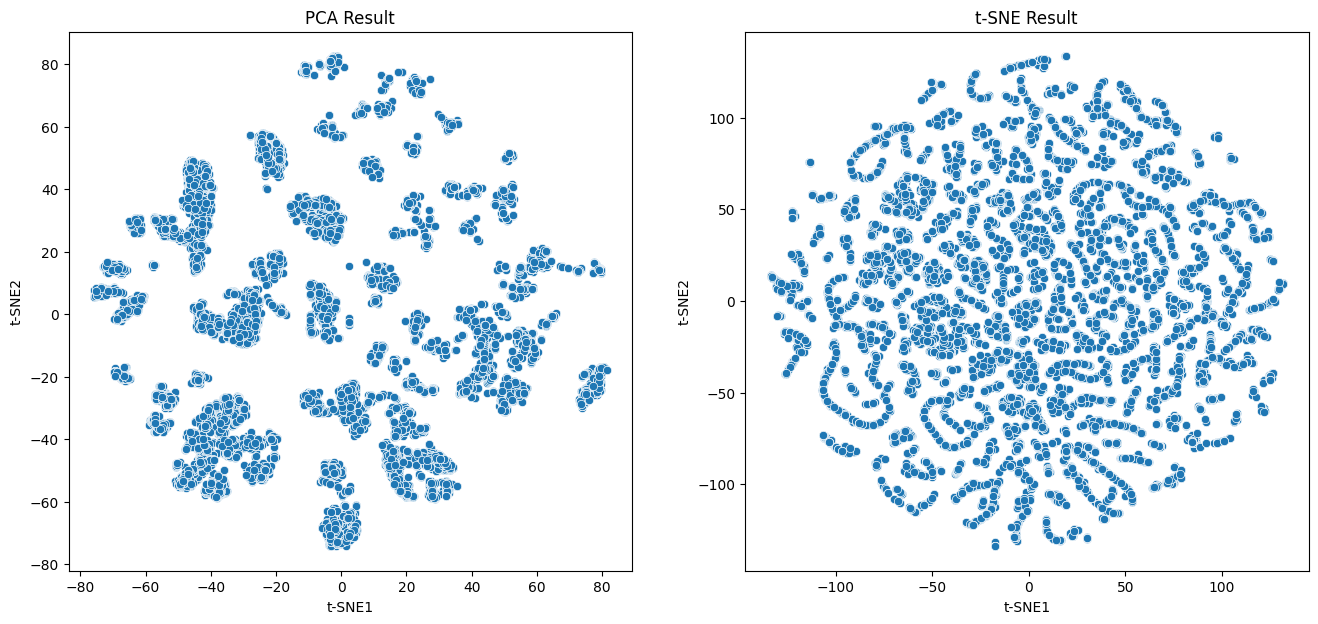

In [42]:
df_pca = pd.read_csv('reduced_data_tsne200.csv')
df_tsne = pd.read_csv('reduced_data_tsne.csv')
# Vẽ biểu đồ kết quả PCA
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=df_pca)
plt.title('PCA Result')

# Vẽ biểu đồ kết quả t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=df_tsne)
plt.title('t-SNE Result')

plt.show()

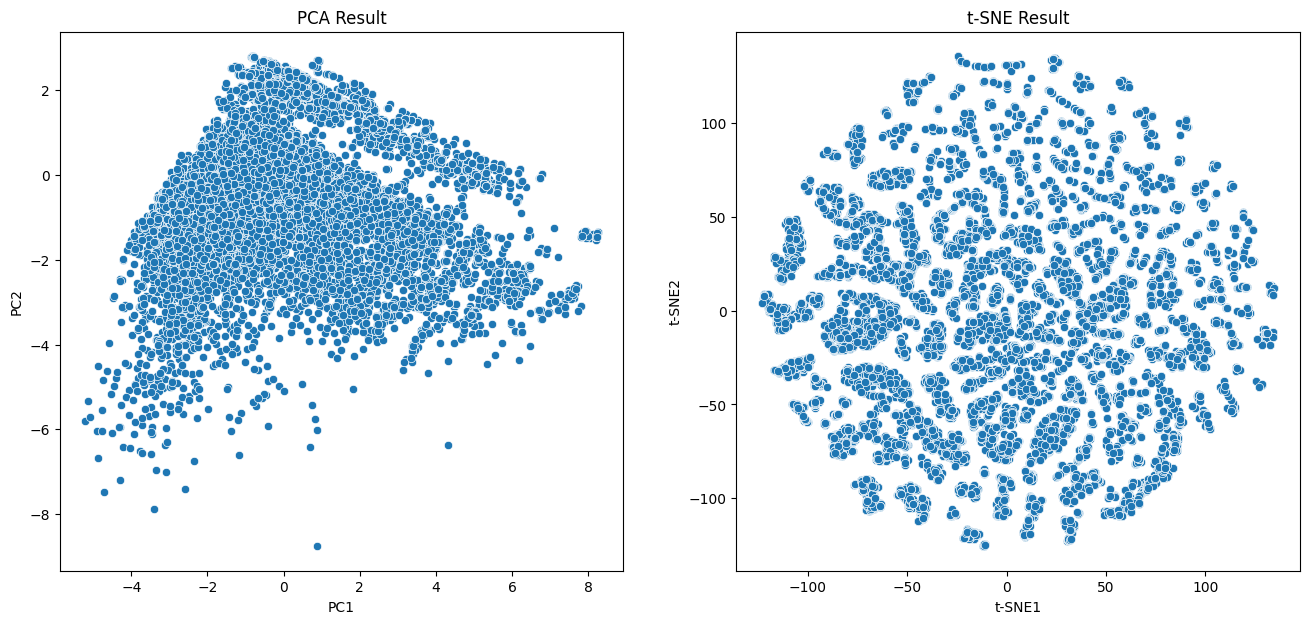

In [26]:
# Đo thời gian thực thi của PCA
start_time_pca = time.time()
pca = PCA(n_components=2)
reduced_df_pca = pca.fit_transform(standard_df)
# Chuyển đổi mảng numpy trở lại DataFrame
reduced_df_pca = pd.DataFrame(reduced_df_pca, columns=['PC1', 'PC2'])
# Lưu DataFrame đã giảm chiều vào file CSV
reduced_df_pca.to_csv('reduced_data_pca.csv', index=False)
end_time_pca = time.time()

# Thời gian thực thi của PCA
execution_time_pca = end_time_pca - start_time_pca

# Đo thời gian thực thi của t-SNE
start_time_tsne = time.time()
tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(standard_df)
# Chuyển đổi mảng numpy trở lại DataFrame
reduced_tsne_df = pd.DataFrame(reduced_tsne, columns=['t-SNE1', 't-SNE2'])

# Lưu DataFrame đã giảm chiều vào file CSV
reduced_tsne_df.to_csv('reduced_data_tsne.csv', index=False)
end_time_tsne = time.time()

# Thời gian thực thi của t-SNE
execution_time_tsne = end_time_tsne - start_time_tsne

print("Thời gian thực thi của PCA:", execution_time_pca, "giây")
print("Thời gian thực thi của t-SNE:", execution_time_tsne, "giây")


reduced_df_pca = pd.read_csv('reduced_data_pca.csv')
reduced_tsne_df = pd.read_csv('reduced_data_tsne.csv')

# So sánh hai phương pháp giảm chiều bằng biểu đồ
plt.figure(figsize=(16, 7))

# Biểu đồ kết quả PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', data=reduced_df_pca)
plt.title('PCA Result')

# Biểu đồ kết quả t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=reduced_tsne_df)
plt.title('t-SNE Result')

plt.show()

Thời gian thực thi của PCA: 0.0897977352142334 giây
Thời gian thực thi của t-SNE: 323.8910479545593 giây


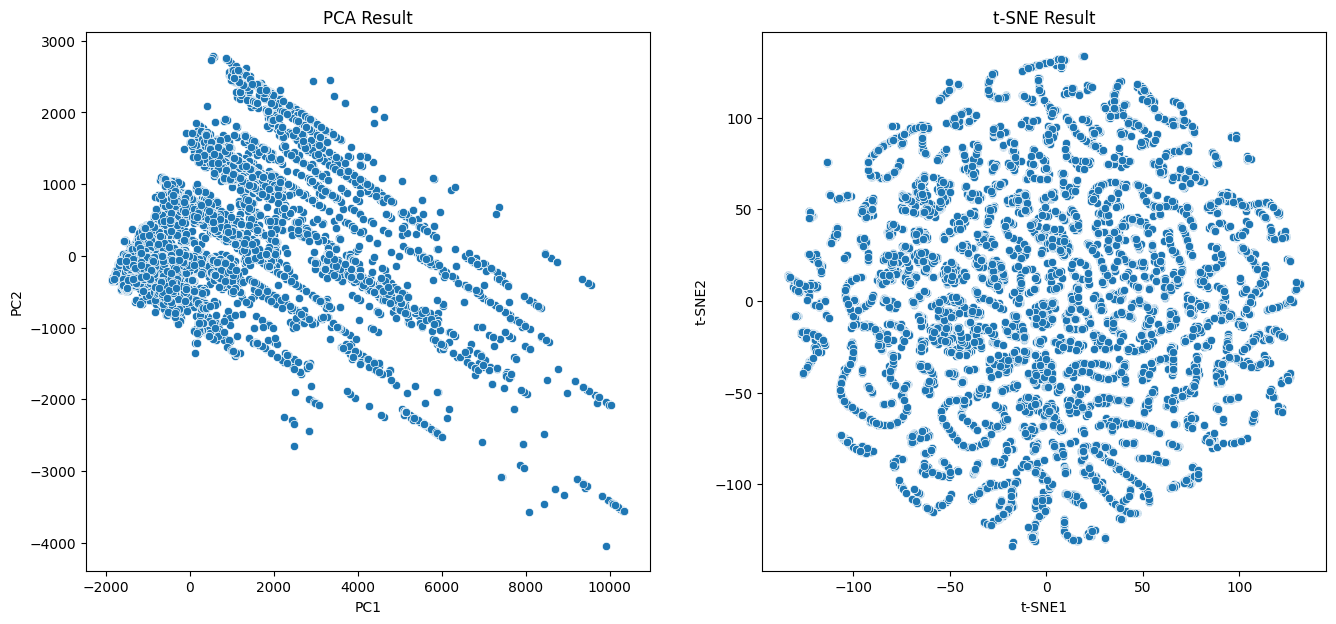

In [27]:
# Đo thời gian thực thi của PCA
start_time_pca = time.time()
pca = PCA(n_components=2)
reduced_df_pca = pca.fit_transform(df)
# Chuyển đổi mảng numpy trở lại DataFrame
reduced_df_pca = pd.DataFrame(reduced_df_pca, columns=['PC1', 'PC2'])
# Lưu DataFrame đã giảm chiều vào file CSV
reduced_df_pca.to_csv('reduced_data_pca.csv', index=False)
end_time_pca = time.time()

# Thời gian thực thi của PCA
execution_time_pca = end_time_pca - start_time_pca

# Đo thời gian thực thi của t-SNE
start_time_tsne = time.time()
tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(df)
# Chuyển đổi mảng numpy trở lại DataFrame
reduced_tsne_df = pd.DataFrame(reduced_tsne, columns=['t-SNE1', 't-SNE2'])

# Lưu DataFrame đã giảm chiều vào file CSV
reduced_tsne_df.to_csv('reduced_data_tsne.csv', index=False)
end_time_tsne = time.time()

# Thời gian thực thi của t-SNE
execution_time_tsne = end_time_tsne - start_time_tsne

print("Thời gian thực thi của PCA:", execution_time_pca, "giây")
print("Thời gian thực thi của t-SNE:", execution_time_tsne, "giây")


reduced_df_pca = pd.read_csv('reduced_data_pca.csv')
reduced_tsne_df = pd.read_csv('reduced_data_tsne.csv')

# So sánh hai phương pháp giảm chiều bằng biểu đồ
plt.figure(figsize=(16, 7))

# Biểu đồ kết quả PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', data=reduced_df_pca)
plt.title('PCA Result')

# Biểu đồ kết quả t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=reduced_tsne_df)
plt.title('t-SNE Result')

plt.show()

Thời gian thực thi của PCA trên dữ liệu chuẩn hóa: 0.007 giây
Thời gian thực thi của t-SNE trên dữ liệu chuẩn hóa: 436.583 giây


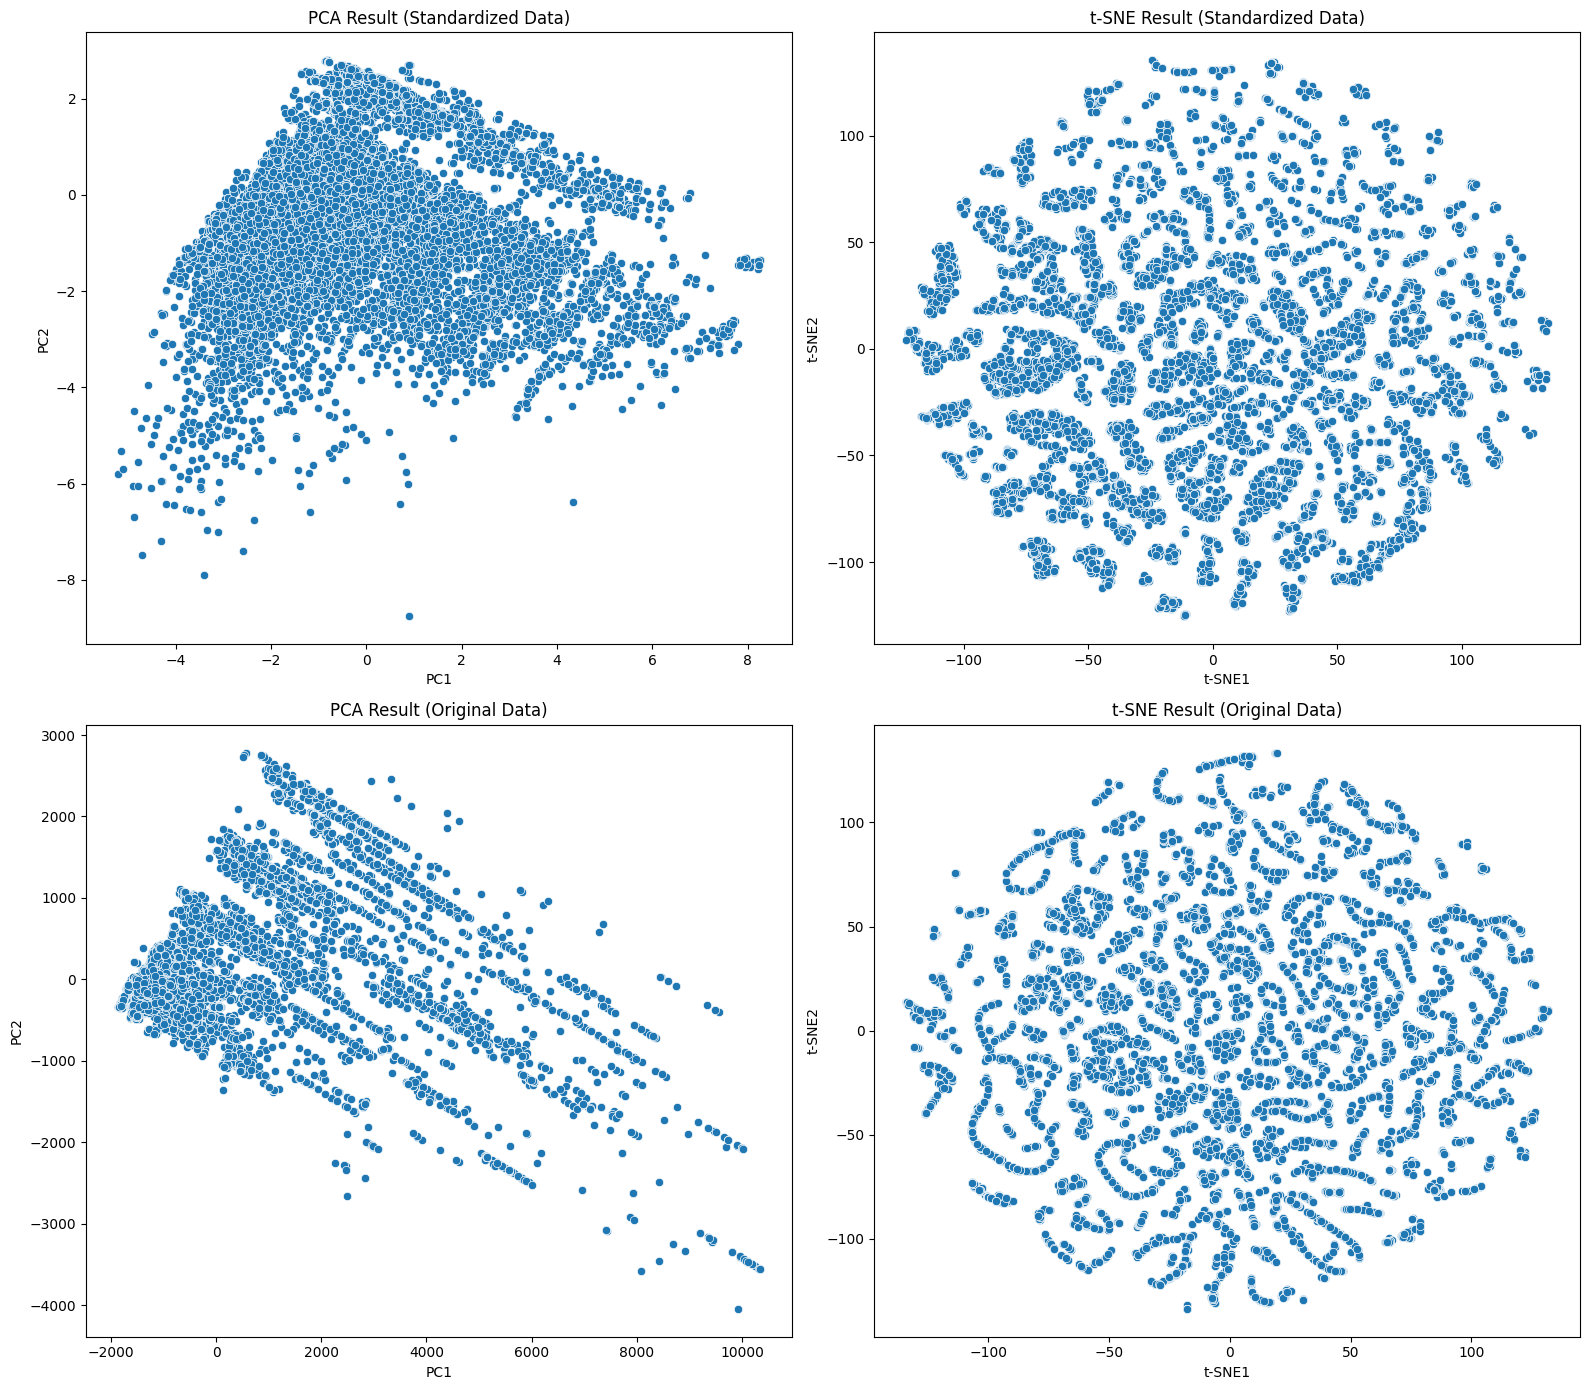

In [28]:
# Đo thời gian thực thi của PCA cho dữ liệu chuẩn hóa
start_time_pca = time.time()
pca = PCA(n_components=2)
reduced_standard_pca = pca.fit_transform(standard_df)
end_time_pca = time.time()
execution_time_pca_standard = round(end_time_pca - start_time_pca, 3)

# Đo thời gian thực thi của t-SNE cho dữ liệu chuẩn hóa
start_time_tsne = time.time()
tsne = TSNE(n_components=2, random_state=42)
reduced_standard_tsne = tsne.fit_transform(standard_df)
end_time_tsne = time.time()
execution_time_tsne_standard = round(end_time_tsne - start_time_tsne, 3)

# Chuyển đổi mảng numpy trở lại DataFrame
reduced_standard_pca = pd.DataFrame(reduced_standard_pca, columns=['PC1', 'PC2'])
reduced_standard_tsne = pd.DataFrame(reduced_standard_tsne, columns=['t-SNE1', 't-SNE2'])


print("Thời gian thực thi của PCA trên dữ liệu chuẩn hóa:", execution_time_pca_standard, "giây")
print("Thời gian thực thi của t-SNE trên dữ liệu chuẩn hóa:", execution_time_tsne_standard, "giây")

# So sánh hai phương pháp giảm chiều bằng biểu đồ
plt.figure(figsize=(16, 14))

# Biểu đồ kết quả PCA trên dữ liệu chuẩn hóa
plt.subplot(2, 2, 1)
sns.scatterplot(x='PC1', y='PC2', data=reduced_standard_pca)
plt.title('PCA Result (Standardized Data)')

# Biểu đồ kết quả t-SNE trên dữ liệu chuẩn hóa
plt.subplot(2, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=reduced_standard_tsne)
plt.title('t-SNE Result (Standardized Data)')

df_pca = pd.read_csv('reduced_data_pca.csv')
df_tsne = pd.read_csv('reduced_data_tsne.csv')

# Biểu đồ kết quả PCA trên dữ liệu gốc
plt.subplot(2, 2, 3)
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA Result (Original Data)')

# Biểu đồ kết quả t-SNE trên dữ liệu gốc
plt.subplot(2, 2, 4)
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=df_tsne)
plt.title('t-SNE Result (Original Data)')

plt.tight_layout()
plt.show()

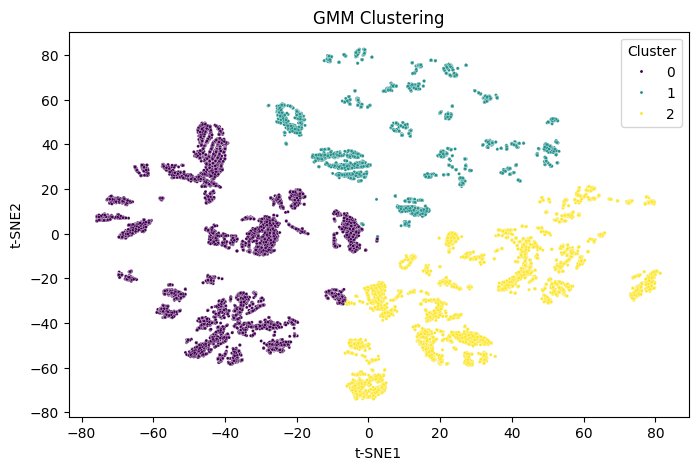

In [55]:

reduced_tsne_df = pd.read_csv('reduced_data_tsne200.csv')
# Số lượng thành phần Gaussian
n_components = 3

# Áp dụng GMM lên dữ liệu giảm chiều của t-SNE
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(reduced_tsne_df)

# Lấy nhãn của mỗi điểm dữ liệu
labels = gmm.predict(reduced_tsne_df)

# Thêm nhãn vào DataFrame đã giảm chiều
reduced_tsne_df['Cluster'] = labels

# Trực quan hóa kết quả
plt.figure(figsize=(8, 5))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', data=reduced_tsne_df, palette='viridis', s=5)
plt.title('GMM Clustering')
plt.show()